#  <center> Problem Set 2 (MHC) <center>
<center> Spring 2022 <center>
<center> 3.C01/3.C51, 10.C01/10.C51, 20.C01/20.C51 <center>
<center> Due: TBD <center>

<b>Name: Kaden Dimarco</b>

<b>Kerberos ID: kaden167</b>

In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import shuffle
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib
import torch

matplotlib.rcParams.update({'font.size': 15})
matplotlib.rc('lines', linewidth=3, color='g')
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams["xtick.major.size"] = 6
matplotlib.rcParams["ytick.major.size"] = 6
matplotlib.rcParams["ytick.major.width"] = 2
matplotlib.rcParams["xtick.major.width"] = 2
matplotlib.rcParams['text.usetex'] = False

### Download required data 

In [ ]:
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/amino_acid.csv
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/ba_train.csv
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/ba_holdout.csv
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/el_train.csv
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/amino_acids.npy

--2022-03-01 20:14:59--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/amino_acid.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8966 (8.8K) [text/plain]
Saving to: ‘amino_acid.csv’

amino_acid.csv      100%[===================>]   8.76K  --.-KB/s    in 0s      

2022-03-01 20:15:00 (53.6 MB/s) - ‘amino_acid.csv’ saved [8966/8966]

--2022-03-01 20:15:00--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/ba_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

## <center>Problem 1: Modeling Binding Affinity</center>

### 1.1 (10 points) Encoding amino acids into feature vectors

In [ ]:
########### Code #############

ba_df = pd.read_csv("ba_train.csv") # read data 
amino_acids = np.load('./amino_acids.npy') # Read all amino acids 

# Your code to featurize amino acids 
p1_y = pd.read_csv("./ba_train.csv", header='infer', usecols=[2])
p1_y = p1_y.values # get binding afinity

p1_X_names = pd.read_csv("./ba_train.csv", header='infer', usecols=[1])
p1_X_names = p1_X_names.values #get sequence names


lb = preprocessing.LabelBinarizer()
lb.fit(amino_acids)

aa_feature_vector = np.zeros((len(p1_X_names),20*9)) # feature encodings for all inputs
each_residue = np.zeros((9,20)) # feature encoding for one input

for i in range(0,len(p1_X_names)):
   
    if i != 0: # put in first input feature encoding into the whole set
        aa_feature_vector[i-1,:] = each_residue.flatten()
    
    for j in range(0,9): #loop through all letters
        each_residue[j,:] = lb.transform([p1_X_names[i][0][j]])[0] #one-hot encoding for a single letter
                
        if i == len(p1_X_names):
            if j == 8:
                aa_feature_vector[i,:] = each_residue.flatten()
                
p1_X_oneHot = aa_feature_vector



########### Code #############
#are my feature vectors and output vectors the right dimension?
print(np.shape(p1_X_oneHot))
print(np.shape(p1_y))


(1226, 180)
(1226, 1)


### 1.2 (5 points) Modeling with ridge regression

Ridge Regression training R^2 score: 0.69
Ridge Regression testing R^2 score: 0.47


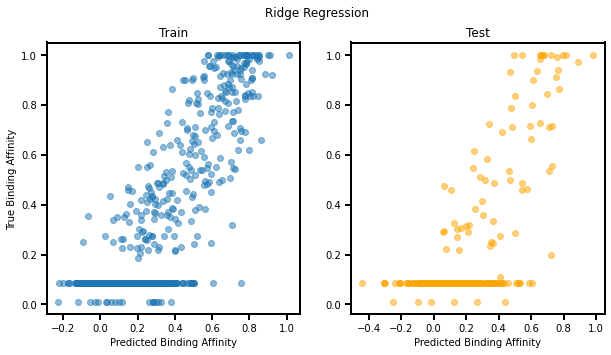

In [ ]:
########### Code #############
X_train_oneHot, X_test_oneHot, y_train_oneHot, y_test_oneHot = train_test_split(p1_X_oneHot, p1_y, train_size=0.8, test_size=0.2, random_state=42)

clf = Ridge()


clf.fit(X_train_oneHot, y_train_oneHot)


test_prediction = clf.predict(X_test_oneHot)
train_prediction = clf.predict(X_train_oneHot)
test_score = clf.score(X_test_oneHot,y_test_oneHot)
train_score = clf.score(X_train_oneHot,y_train_oneHot)


# Code snippet to generate scatter plot 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(train_prediction, y_train_oneHot, label='Train', alpha=0.5)
ax[1].scatter(test_prediction, y_test_oneHot, label='Test', alpha=0.5, c='orange')

ax[0].set_ylabel("True Binding Affinity")
ax[0].set_xlabel("Predicted Binding Affinity")
ax[1].set_xlabel("Predicted Binding Affinity")
ax[0].set_title('Train')
ax[1].set_title('Test')
fig.suptitle('Ridge Regression')

print("Ridge Regression training R^2 score: {:.2f}".format(train_score))
print("Ridge Regression testing R^2 score: {:.2f}".format(test_score))

########### Code #############

#did I mess up since R^2?

### 1.3 (10 points) Modeling with a multi-layer perceptron

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP Regression training R^2 score: 0.98
MLP Regression testing R^2 score: 0.64


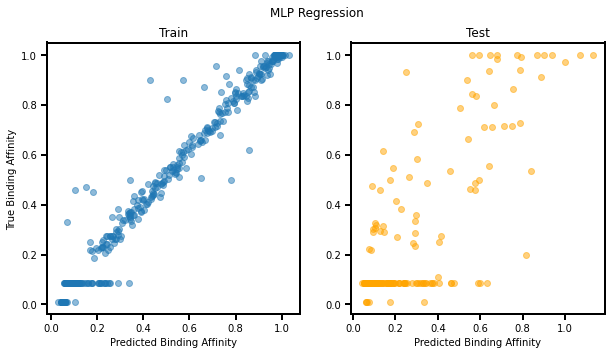

In [ ]:
########### Code #############


regr = MLPRegressor(hidden_layer_sizes = (512, 256, 128), activation = 'relu',
                   alpha = 0.08, solver = 'adam', early_stopping = True).fit(X_train_oneHot, y_train_oneHot)

test_prediction = regr.predict(X_test_oneHot)
train_prediction = regr.predict(X_train_oneHot)
test_score = regr.score(X_test_oneHot,y_test_oneHot)
train_score = regr.score(X_train_oneHot,y_train_oneHot)


# Code snippet to generate scatter plot 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(train_prediction, y_train_oneHot, label='Train', alpha=0.5)
ax[1].scatter(test_prediction, y_test_oneHot, label='Test', alpha=0.5, c='orange')

ax[0].set_ylabel("True Binding Affinity")
ax[0].set_xlabel("Predicted Binding Affinity")
ax[1].set_xlabel("Predicted Binding Affinity")
ax[0].set_title('Train')
ax[1].set_title('Test')
fig.suptitle('MLP Regression')

print("MLP Regression training R^2 score: {:.2f}".format(train_score))
print("MLP Regression testing R^2 score: {:.2f}".format(test_score))

########### Code #############

Calculate the total of number of parameters in your MLP model. What does the input hidden_layers_sizes = (512, 256, 128) mean? 

In [ ]:
########## Answer ############
params = regr.get_params()
print(len(params))


#hidden_layers_sizes = (512, 256, 128) means that there are three hidden layers and each layer has the number of
#neurons corresponding to the index in the tuple (0th layer has 512 neurons).
########## Answer ############

23


### 1.4 (3 points) Chemical transferability of one-hot representations

MLP validation R^2 score: -0.07
Ridge validation R^2 score: 0.01


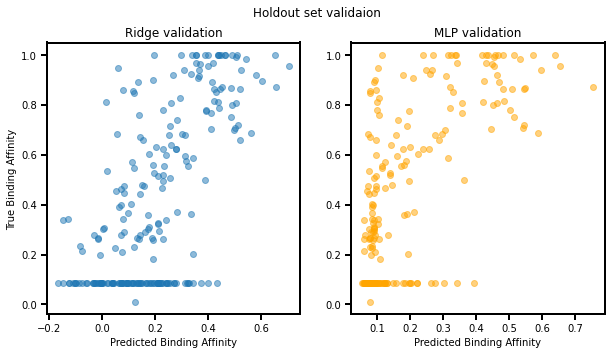

In [ ]:
########### Code #############

# Load the holdout dataset which contains amino acids not seen in the training data
p1_y_holdout = pd.read_csv("./ba_holdout.csv", header='infer', usecols=[2])
p1_y_holdout = p1_y_holdout.values  # get binding afinity

p1_X_names = pd.read_csv("./ba_holdout.csv", header='infer', usecols=[1])
p1_X_names = p1_X_names.values  #get sequence names

lb = preprocessing.LabelBinarizer()
lb.fit(amino_acids)

aa_feature_vector = np.zeros((len(p1_X_names), 20*9))
each_residue = np.zeros((9, 20))

for i in range(0, len(p1_X_names)):
    if i != 0:
        aa_feature_vector[i-1, :] = each_residue.flatten()
    for j in range(0, 9):
        each_residue[j, :] = lb.transform([p1_X_names[i][0][j]])[0]

        if i == len(p1_X_names):
            if j == 8:
                aa_feature_vector[i, :] = each_residue.flatten()

p1_X_oneHot_holdout = aa_feature_vector

ridge_holdout_prediction = clf.predict(p1_X_oneHot_holdout)
regr_holdout_prediction = regr.predict(p1_X_oneHot_holdout)


# Code snippet to generate scatter plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(ridge_holdout_prediction, p1_y_holdout, label='Ridge validation', alpha=0.5)
ax[1].scatter(regr_holdout_prediction, p1_y_holdout, label='MLP validation', alpha=0.5, c='orange')

ax[0].set_ylabel("True Binding Affinity")
ax[0].set_xlabel("Predicted Binding Affinity")
ax[1].set_xlabel("Predicted Binding Affinity")
ax[0].set_title('Ridge validation')
ax[1].set_title('MLP validation')
fig.suptitle('Holdout set validaion')

regr_score = regr.score(p1_X_oneHot_holdout, p1_y_holdout)
ridge_score = clf.score(p1_X_oneHot_holdout, p1_y_holdout)

print("MLP validation R^2 score: {:.2f}".format(regr_score))
print("Ridge validation R^2 score: {:.2f}".format(ridge_score))
########### Code #############

Comment on your validation results and briefly explain.

In [ ]:
########## Answer ############

#Ridge validation performed fairly well, since ridge regression fits less coeficients, it is more easily
#interpretable. This interpretability may be due to ridge validation picking up some underlying
#forces that can drive output labeling

#MLP regression has more coefficients than ridge regression. This would make the model more fit to specific
#training sets, hence bad performance on another dataset.
#the difference is very small though, so the low performance is most likely due to a difficult holdout set
########## Answer ############

### 1.5 (5 points) Featurize amino acids with physical descriptors

Training R^2 score: 0.97
Testing R^2 score: 0.63


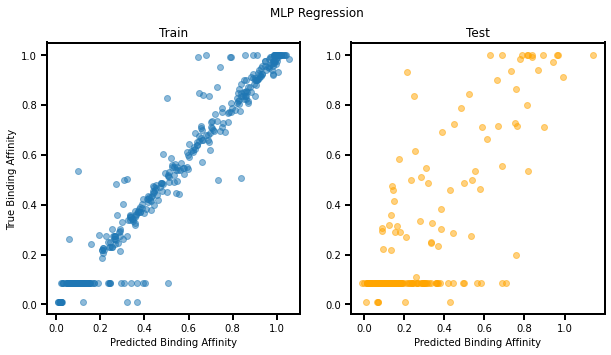

In [24]:
########### Code #############

amino_acid_df = pd.read_csv("amino_acid.csv")
amino_acid_df = amino_acid_df.set_index('Amino Acids')

p1_X_names = pd.read_csv("./ba_train.csv", header='infer', usecols=[1])
p1_X_names = p1_X_names.values #get sequence names

p1_y = pd.read_csv("./ba_train.csv", header='infer', usecols=[2])
p1_y = p1_y.values # get binding afinity

aa_feature_vector = np.zeros((len(p1_X_names),75*9))
each_residue = np.zeros((9,75))

for i in range(0,len(p1_X_names)):
    if i != 0:
        aa_feature_vector[i-1,:] = each_residue.flatten()
    for j in range(0,9):
        each_residue[j,:] = amino_acid_df.loc[[p1_X_names[i][0][j]]].to_numpy()[0]
                
        if i == len(p1_X_names):
            if j == 8:
                aa_feature_vector[i,:] = each_residue.flatten()
                
p1_X = aa_feature_vector

X_train, X_test, y_train, y_test = train_test_split(p1_X, np.ravel(p1_y), train_size=0.8, test_size=0.2, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regr = MLPRegressor(hidden_layer_sizes = (512, 256, 128), activation = 'relu',
                   alpha = 0.08, solver = 'adam', early_stopping = True).fit(X_train, y_train)

test_prediction = regr.predict(X_test)
train_prediction = regr.predict(X_train)
test_score = regr.score(X_test,y_test)
train_score = regr.score(X_train,y_train)


# Code snippet to generate scatter plot 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(train_prediction, y_train, label='Train', alpha=0.5)
ax[1].scatter(test_prediction, y_test, label='Test', alpha=0.5, c='orange')

ax[0].set_ylabel("True Binding Affinity")
ax[0].set_xlabel("Predicted Binding Affinity")
ax[1].set_xlabel("Predicted Binding Affinity")
ax[0].set_title('Train')
ax[1].set_title('Test')
fig.suptitle('MLP Regression')






print("Training R^2 score: {:.2f}".format(train_score) )
print("Testing R^2 score: {:.2f}".format(test_score) )


########### Code #############

### 1.6 (5 points) Chemical transferability of physical descriptors 

MLP holdout R^2 score: 0.29


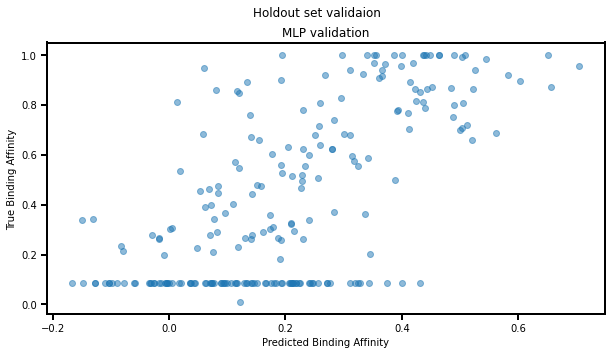

In [25]:
########### Code #############

# For the holdout set, encode features with the amino acid descriptor 

amino_acid_df = pd.read_csv("amino_acid.csv")
amino_acid_df = amino_acid_df.set_index('Amino Acids')
p1_X_names = pd.read_csv("./ba_holdout.csv", header='infer', usecols=[1])
p1_X_names = p1_X_names.values #get sequence names

p1_y_holdout = pd.read_csv("./ba_holdout.csv", header='infer', usecols=[2])
p1_y_holdout = p1_y_holdout.values # get binding afinity

aa_feature_vector = np.zeros((len(p1_X_names),75*9))
each_residue = np.zeros((9,75))

for i in range(0,len(p1_X_names)):
    if i != 0:
        aa_feature_vector[i-1,:] = each_residue.flatten()
    for j in range(0,9):
        each_residue[j,:] = amino_acid_df.loc[[p1_X_names[i][0][j]]].to_numpy()[0]
                
        if i == len(p1_X_names):
            if j == 8:
                aa_feature_vector[i,:] = each_residue.flatten()
                
p1_X = scaler.transform(aa_feature_vector)

regr_holdout_prediction = regr.predict(p1_X)


# Code snippet to generate scatter plot 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.scatter(ridge_holdout_prediction, p1_y_holdout, label='Ridge validation', alpha=0.5)


ax.set_ylabel("True Binding Affinity")
ax.set_xlabel("Predicted Binding Affinity")
ax.set_title('MLP validation')
fig.suptitle('Holdout set validaion')

regr_score = regr.score(p1_X,p1_y_holdout)

print("MLP holdout R^2 score: {:.2f}".format(regr_score))

########### Code #############

Briefly comment on your validation performance and explain why.

In [ ]:
########## Answer ############

#MLP prediction of inputs with physically encoded features was notably better than that
#of one-hot features because one-hot encoding does not apply well to 
#features that are not represented in the training set




########## Answer ############

## <center>Problem 2: Hyperparameter Tuning and Modeling Eluted Ligand Data</center>

### 2.1 (15 points) Optimize neural network architectures with HyperOpt

In [ ]:
########### Code #############

from hyperopt import hp
from hyperopt import fmin, tpe, space_eval, Trials
from sklearn.model_selection import cross_val_score


# Stack train and holdout set together

p2_X = np.vstack((p1_X_oneHot_holdout, X_train_oneHot))
p2_y = np.vstack((p1_y_holdout, y_train_oneHot))

def hyperoptoutput2param(best):
    
    '''Change hyperopt output to dictionary with values '''
    
    for key in best.keys():
        if key in hyper_dict.keys():
            best[key] = hyper_dict[key][ best[key] ] 
            
    return best

# Define a dictionary for each parameter range 


hyper_dict = {
    "hidden_layer_sizes": [(512, 256, 128), (256, 128, 64), (512, 512, 256), (256, 256, 256)],
    "solver": ['sgd', 'adam'],
    "activation": ['relu', 'tanh'],
    "alpha":[0.08, 0.16, 0.32, 0.64]
}

MLPRegressor(hidden_layer_sizes = (512, 256, 128), activation = 'relu',
                   alpha = 0.08, solver = 'adam', early_stopping = False).fit(X_train, y_train)

parameter_space =  { "hidden_layer_sizes": hp.choice("hidden_layer_sizes", hyper_dict['hidden_layer_sizes']),
            "solver": hp.choice("solver", hyper_dict['solver']), 
            "activation": hp.choice("activation", hyper_dict['activation']), 
            "alpha": hp.choice("alpha", hyper_dict['alpha'])
                    }

# Evaluation function 
# args should be a dict, with keys for number of hidden layers, optimizer, activation, and alpha
def model_eval(args):
    
    '''Take suggested arguments and perform model evaluation'''

    # your code here to train MLPRegressors and to run CV score on the training data 
    regr = MLPRegressor(**args, early_stopping = False).fit(p2_X, np.ravel(p2_y))
    cv_score = np.mean(cross_val_score(regr, p2_X, np.ravel(p2_y), cv = 5))
    
    # return the negative of the CV score to ensure we maximize R^2 by minimizing the loss
    return -cv_score

print("Start trials") 

trials = Trials()
best = fmin(model_eval, parameter_space, algo=tpe.suggest, max_evals=40, trials=trials) # this will take a while to run 
best = hyperoptoutput2param(best)

print("Best parameter set: {}".format(best))
print("Best loss from CV {:.2f}".format(-trials.best_trial['result']['loss']))

########### Code #############

Start trials
  0%|          | 0/40 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


  2%|▎         | 1/40 [00:57<37:41, 57.99s/it, best loss: -0.4111238704561269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 10%|█         | 4/40 [04:04<34:38, 57.73s/it, best loss: -0.4111238704561269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 12%|█▎        | 5/40 [05:45<42:55, 73.57s/it, best loss: -0.4111238704561269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 15%|█▌        | 6/40 [07:13<44:22, 78.29s/it, best loss: -0.415365867269609] 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 18%|█▊        | 7/40 [10:28<1:04:01, 116.39s/it, best loss: -0.415365867269609]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 20%|██        | 8/40 [11:05<48:42, 91.34s/it, best loss: -0.415365867269609]   

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 22%|██▎       | 9/40 [14:16<1:03:13, 122.37s/it, best loss: -0.415365867269609]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 25%|██▌       | 10/40 [15:11<50:46, 101.55s/it, best loss: -0.5039573207930557]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 28%|██▊       | 11/40 [16:01<41:25, 85.71s/it, best loss: -0.5039573207930557] 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 30%|███       | 12/40 [18:01<44:53, 96.19s/it, best loss: -0.5039573207930557]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 35%|███▌      | 14/40 [20:37<37:23, 86.28s/it, best loss: -0.5525051421185558]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 38%|███▊      | 15/40 [21:55<34:55, 83.83s/it, best loss: -0.5525051421185558]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 40%|████      | 16/40 [25:37<50:08, 125.37s/it, best loss: -0.5525051421185558]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 42%|████▎     | 17/40 [29:09<58:02, 151.40s/it, best loss: -0.5525051421185558]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 45%|████▌     | 18/40 [32:33<1:01:20, 167.27s/it, best loss: -0.5525051421185558]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 88%|████████▊ | 35/40 [47:16<03:32, 42.56s/it, best loss: -0.5742065195168493]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 90%|█████████ | 36/40 [48:30<03:28, 52.17s/it, best loss: -0.5742065195168493]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 92%|█████████▎| 37/40 [49:21<02:35, 51.70s/it, best loss: -0.5742065195168493]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 95%|█████████▌| 38/40 [50:57<02:10, 65.07s/it, best loss: -0.5742065195168493]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



100%|██████████| 40/40 [52:04<00:00, 78.12s/it, best loss: -0.5742065195168493]
Best parameter set: {'activation': 'relu', 'alpha': 0.64, 'hidden_layer_sizes': (512, 256, 128), 'solver': 'adam'}
Best loss from CV 0.57


Train a MLP with the hyperparameters obtained.

In [ ]:
########### Code #############
p2_X = np.vstack((p1_X_oneHot_holdout, X_train_oneHot))
p2_y = np.vstack((p1_y_holdout, y_train_oneHot))

p2_X_test = X_test_oneHot
p2_y_test = y_test_oneHot

regr = MLPRegressor(activation = 'relu', alpha = 0.64, hidden_layer_sizes = (512,256,128), solver = 'adam', early_stopping = False).fit(p2_X, np.ravel(p2_y))
test_score = regr.score(p2_X_test, p2_y_test)
print(test_score)

########### Code #############

0.5833794044209392


Report your parameter set. Have your predictions improved? 

In [27]:
params = regr.get_params()
print(params)

{'activation': 'relu', 'alpha': 0.08, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (512, 256, 128), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [ ]:
########## Answer ############

#The prediction of the MLP model with tuned hyperparameters was slightly worse 
# than that of the MLP model without tuned hyperparameters because the tuned model
#contained the holdout set in its training data, which likely led to worse performance

########## Answer ############

### 2.2 (5 points) Applying MLPs to classifying eluted ligands

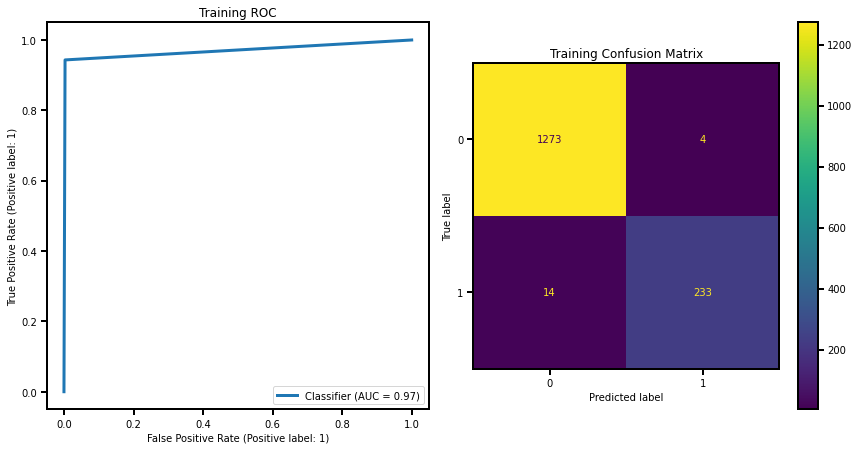

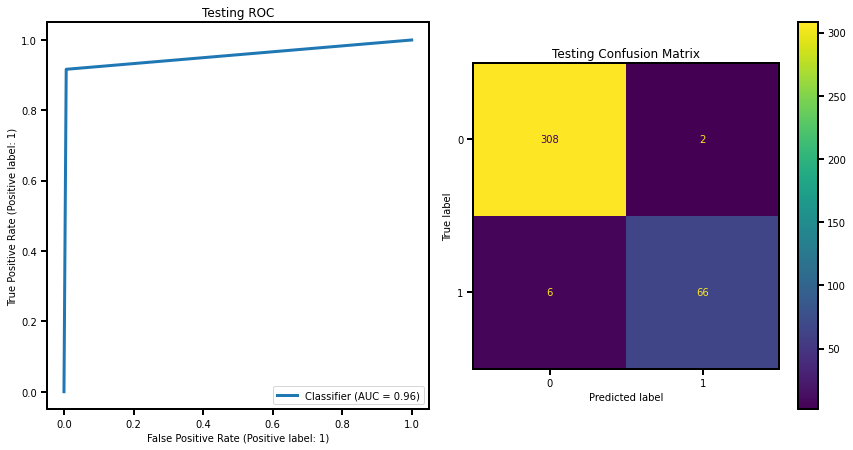

In [28]:
########### Code #############
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
def plot_clf(model, X, y, title): 
    
    '''
        A function to plot confusion matrix and ROC curve 
        
        Args: 
            model(classifier object): model object (e.g. RandomForestClassifier, LogisticRegression)
            X(np.array): feature set
            y(np.array): label set 
            title(str): plot name
            
        Example Usage: 
            plot_clf(model, X_test, y_test, "test")
    '''
    
    fig, [ax_roc, ax_conf] = plt.subplots(1, 2, figsize=(12, 6))
    fig.tight_layout()
    
    y_true = y
    y_pred = model.predict(X)
    
    RocCurveDisplay.from_predictions(y_true, np.ravel(y_pred), ax=ax_roc)
    
    ConfusionMatrixDisplay.from_predictions(y_true, np.ravel(y_pred), ax=ax_conf)

    ax_roc.set_title('{} ROC'.format(title))
    ax_conf.set_title('{} Confusion Matrix'.format(title))

    plt.show()


el_df = pd.read_csv("el_train.csv") # read data 
amino_acids = np.load('./amino_acids.npy')

p2_2_y = el_df[['Eluted Ligand']].to_numpy()[:,0]
aa_names_2 = el_df[['Peptide']].to_numpy()[:,0]


lb = preprocessing.LabelBinarizer()
lb.fit(amino_acids)

aa_feature_vector = np.zeros((len(aa_names_2),20*9)) # feature encodings for all inputs
each_residue = np.zeros((9,20)) # feature encoding for one input

for i in range(0,len(aa_names_2)):
   
    if i != 0: # put in first input feature encoding into the whole set
        aa_feature_vector[i-1,:] = each_residue.flatten()
    
    for j in range(0,9): #loop through all letters
        each_residue[j,:] = lb.transform([aa_names_2[i][j]])[0] #one-hot encoding for a single letter
                
        if i == len(aa_names_2):
            if j == 8:
                aa_feature_vector[i,:] = each_residue.flatten()
                
p2_X_oneHot = aa_feature_vector

X_train, X_test, y_train, y_test = train_test_split(p2_X_oneHot, p2_2_y, train_size = 0.8, test_size = 0.2)



regf = MLPClassifier(**params).fit(X_train, np.ravel(y_train))

plot_clf(regf, X_train, y_train, 'Training')
plot_clf(regf, X_test, y_test, 'Testing')

########### Code #############

## <center> Problem 3: Accelerating Neural Networks with GPUs </center>

### 3.1 (2 points) Request a GPU on Google Colab

Run this cell as-is, with no modifications, to show that you successfully requested a GPU.

In [29]:
# Check if your GPU is requested successfully or not 
assert torch.cuda.device_count() != 0

### 3.2 (10 points) Build Datasets and DataLoaders in PyTorch

Generate a validation set.

In [ ]:
########### Code #############
p2_X = np.vstack((p1_X_oneHot_holdout, X_train_oneHot))
p2_y = np.vstack((p1_y_holdout, y_train_oneHot))
p2_X_train, p2_X_validation, p2_y_train, p2_y_validation = train_test_split(p2_X, np.ravel(p2_y), train_size=0.9, test_size=0.1, random_state=42)

p2_X_test = X_test_oneHot
p2_y_test = y_test_oneHot

########### Code #############

A SequenceDataset class for you to construct your dataloaders.

In [ ]:
# Generate dataset
class SequenceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.Tensor(np.array(X))  # store X as a pytorch Tensor
        self.y = torch.Tensor(np.array(y))  # store y as a pytorch Tensor
        self.len=len(self.X)                # number of samples in the data 

    def __getitem__(self, index):
        return self.X[index], self.y[index] # get the appropriate item

    def __len__(self):
        return self.len

Fill in the skeleton code to construct your Datasets and DataLoaders.

In [ ]:
########### Code #############

train_data = SequenceDataset(p2_X_train, p2_y_train)# fill in arguments
val_data = SequenceDataset(p2_X_validation, p2_y_validation)# fill in arguments
test_data = SequenceDataset(p2_X_test,p2_y_test)# fill in arguments

batch_size = 256 # fill in batch size
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)# fill in shuffle argument
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)# fill in shuffle argument
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)# fill in shuffle argument


########### Code #############

Run this cell to check that your DataLoaders work as expected.

In [ ]:
########### Code #############

for loader in [train_dataloader, val_dataloader, test_dataloader]:
    for index, batch in enumerate(loader): 
        # Your batch returns a X, y stacked in a batch 
        X_batch, y_batch = batch[0], batch[1]
        if index == 0:
            print(X_batch.shape, y_batch.shape)
        
########### Code #############

torch.Size([256, 180]) torch.Size([256])
torch.Size([122, 180]) torch.Size([122])
torch.Size([246, 180]) torch.Size([246, 1])


### 3.3 (15 points) Define the MLP in PyTorch

Look at the following code snippet to understand how the linear layer works in PyTorch. Take careful note of the dimensions of the input and output.

In [30]:
linear = torch.nn.Linear(2, 3)

input_tensor = torch.ones((4, 2))
output_tensor = linear(input_tensor)

print(input_tensor, output_tensor, input_tensor.shape, output_tensor.shape)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]) tensor([[-0.3280, -1.4505,  0.3549],
        [-0.3280, -1.4505,  0.3549],
        [-0.3280, -1.4505,  0.3549],
        [-0.3280, -1.4505,  0.3549]], grad_fn=<AddmmBackward0>) torch.Size([4, 2]) torch.Size([4, 3])


Look at the following code snippet to understand how the ReLU layer works in PyTorch (the Tanh layer is similar). Take careful note of the dimensions of the input and output.

In [31]:
relu = torch.nn.ReLU()

input_tensor = torch.ones((4, 2))
output_tensor = relu(input_tensor)

print(input_tensor, output_tensor, input_tensor.shape, output_tensor.shape)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]) tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]) torch.Size([4, 2]) torch.Size([4, 2])


Look at the following code snippet to understand how to stack layers with the Sequential module.

In [32]:
layer1 = torch.nn.Linear(2, 3)
layer2 = torch.nn.Linear(3, 4)

sequential = torch.nn.Sequential(layer1, layer2)

input_tensor = torch.ones((5, 2))
output_tensor = sequential(input_tensor)

print(input_tensor, output_tensor, input_tensor.shape, output_tensor.shape)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]) tensor([[-0.1624,  0.4830,  0.3220, -0.3828],
        [-0.1624,  0.4830,  0.3220, -0.3828],
        [-0.1624,  0.4830,  0.3220, -0.3828],
        [-0.1624,  0.4830,  0.3220, -0.3828],
        [-0.1624,  0.4830,  0.3220, -0.3828]], grad_fn=<AddmmBackward0>) torch.Size([5, 2]) torch.Size([5, 4])


Build your MLP within the following torch.nn.Module object. Remember to use your hyperparameters from part 2.1.

In [ ]:
########### Code #############

#Best parameter set: {'activation': 'relu', 'alpha': 0.64, 'hidden_layer_sizes': (512, 512, 256), 'solver': 'adam'} old

#Best parameter set: {'activation': 'relu', 'alpha': 0.64, 'hidden_layer_sizes': (512, 256, 128), 'solver': 'adam'}

class SequenceMLP(torch.nn.Module):
    def __init__(self):
        # You can modify this method to pass hyperparameters above, but this is not necessary
        # since we already have fixed hyperparameters
        super().__init__()
        
        # Implement your code here
        relu = torch.nn.ReLU()
        layer1 = torch.nn.Linear(180, 512)
        layer2 = torch.nn.Linear(512, 256)
        layer3 = torch.nn.Linear(256, 128)
        layer4 = torch.nn.Linear(128, 1)

        self.model = torch.nn.Sequential(layer1,relu,layer2,relu,layer3,relu,layer4)# fill in model here
        
    def forward(self, x):
        x = self.model(x)
        
        return x

########### Code #############

### 3.4 (10 points) Implement functions for training and testing

Define your model, device, and optimizer.

In [ ]:
########### Code #############

# device to train on
device = 'cuda:0'
# define your model
model = SequenceMLP().to(device)

# define your optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3) # fill in optimizer here

########### Code #############

Implement your training and validation loops here.

In [ ]:
########### Code #############

def train(model, dataloader, optimizer, device):
    
    '''
    A function train on the entire dataset for one epoch .
    
    Args: 
        model (torch.nn.Module): your model from before 
        dataloader (torch.utils.data.DataLoader): DataLoader object for the train data
        optimizer (torch.optim.Optimizer(()): optimizer object to interface gradient calculation and optimization 
        device (str): Your device (usually 'cuda:0' for your GPU)
        
    Returns: 
        float: loss averaged over all the batches 
    
    '''

    epoch_loss = []
    model.train() # Set model to training mode 
    
    for batch in dataloader:    
        X, y = batch
        X = X.to(device)
        y = y.to(device)
        
        # train your model on each batch here 
        y_pred = model(X)

        loss = torch.nn.functional.mse_loss(y_pred.squeeze(),y.squeeze())# fill in loss here

        epoch_loss.append(loss.item())
        
        # run backpropagation given the loss you defined
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return np.array(epoch_loss).mean()


def validate(model, dataloader, device):
    
    '''
    A function validate on the validation dataset for one epoch .
    
    Args: 
        model (torch.nn.Module): your model for before 
        dataloader (torch.utils.data.DataLoader): DataLoader object for the validation data
        device (str): Your device (usually 'cuda:0' for your GPU)
        
    Returns: 
        float: loss averaged over all the batches 
    
    '''
    
    val_loss = []
    model.eval() # Set model to evaluation mode 
    with torch.no_grad():    
        for batch in dataloader:
            X, y = batch
            X = X.to(device)
            y = y.to(device)
            
            # validate your model on each batch here 
            y_pred = model(X)
            loss = torch.nn.functional.mse_loss(y_pred.squeeze(),y.squeeze())# fill in loss here
            val_loss.append(loss.item())
            
    return np.array(val_loss).mean()

########### Code #############

Train and validate your model.

In [ ]:
print("epoch", "train loss", "validation loss")

val_loss_curve = []
train_loss_curve = []

for epoch in range(400):
    
    # Compute train your model on training data
    epoch_loss = train(model, train_dataloader, optimizer,  device=device)
    
    # Validate your on validation data 
    val_loss = validate(model, val_dataloader, device=device) 
    
    # Record train and loss performance 
    train_loss_curve.append(epoch_loss)
    val_loss_curve.append(val_loss)
    
    print(epoch, epoch_loss, val_loss)

epoch train loss validation loss
0 0.08970125019550323 0.08565488457679749
1 0.07205364778637886 0.07590970396995544
2 0.05326615124940872 0.0600266270339489
3 0.03364075012505054 0.05135389789938927
4 0.022239026427268983 0.05320054665207863
5 0.01615854036062956 0.04492078348994255
6 0.012009183689951897 0.04723786190152168
7 0.009105486422777176 0.04387941211462021
8 0.0066454485058784485 0.04055255278944969
9 0.0049761326517909765 0.0440690852701664
10 0.003932730620726943 0.041868727654218674
11 0.0028434575302526354 0.04062870144844055
12 0.00236862872261554 0.04313051700592041
13 0.002112302207387984 0.04116380214691162
14 0.001864997239317745 0.04113493487238884
15 0.0014354680781252683 0.04294554516673088
16 0.0012378831044770778 0.042724113911390305
17 0.0011367291095666586 0.04268117621541023
18 0.0011526557384058834 0.04292570427060127
19 0.0009379988769069314 0.043114129453897476
20 0.001014195627067238 0.042626552283763885
21 0.0008877915213815867 0.0422859862446785
22 0.

Plot your train and validation loss curves.

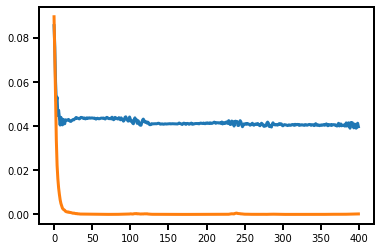

In [ ]:
plt.plot(val_loss_curve)
plt.plot(train_loss_curve) #training should go close to zero by end of training

Compute your R^2 on the test set.

In [ ]:
########### Code #############

from sklearn.metrics import r2_score

# code to compute r^2 goes here
model.eval()
# for batch in test_dataloader:    
#         X, y = batch
#         X = X.to(device)
#         y = y.to(device)

x,y = next(iter(test_dataloader))
x,y = x.to(device), y.to(device)

# print(shape(y))
# print(shape(y_pred))
y_pred = model(x)

y_pred_np = y_pred.cpu().detach().numpy()

score = r2_score(y_pred_np, y.cpu().detach().numpy())

print(score)

#model(test_data)
########### Code #############

0.49385333003740095
